# Лабораторная работа 3. Pandas, метод ближайших соседей и решающие деревья.

Name:

Student ID: 

Email:

In [1]:
import numpy as np
import pandas as pd

## Часть 1: Pandas

#### Ответьте на вопросы о данных по авиарейсам в США.

Данные: http://stat-computing.org/dataexpo/2009/2008.csv.bz2
(обратите внимание, что распаковывать этот файл не обязательно — функция `pandas.read_csv` умеет читать из архивов автоматически)

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

1. Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)
2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
3. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?
4. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?
5. Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
6. Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [2]:
data = pd.read_csv("2008.csv.bz2")
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [5]:
#Task 1
result = data['CancellationCode'].value_counts().index[0]
print("The answer is: ", result)
print("The most common reason for flight cancellation is Weather Conditions")

The answer is:  B
The most common reason for flight cancellation is Weather Conditions


In [6]:
#Task 2
miN = data['Distance'].min()
maX = data['Distance'].max()
avg = data['Distance'].mean()
print("The minimal distance is: ", miN)
print("The maximum distance is: ", maX)
print("The average distance is: ", avg)

The minimal distance is:  11
The maximum distance is:  4962
The average distance is:  726.3870294253928


In [18]:
#Task 3
data[data['Distance'] == data['Distance'].min()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,...,10.0,7.0,0,NaN,0,145.0,0.0,0.0,0.0,0.0
4392215,2008,8,10,7,1315.0,1220,1415.0,1320,OH,5572,...,8.0,38.0,0,NaN,0,55.0,0.0,0.0,0.0,0.0


In [19]:
flight1 = sorted(data[data['FlightNum'] == 4988]['Distance'].unique())
flight2 = sorted(data[data['FlightNum'] == 5572]['Distance'].unique())

print("Distances for flight number 4988: ", flight1)
print("Distances for flight number 5572: ", flight2)

Distances for flight number 4988:  [11, 96, 223, 321, 414, 712, 834, 903]
Distances for flight number 5572:  [11, 134, 329, 363, 508, 544, 669]


In [22]:
#Task 4
result = data['Origin'].value_counts().index[0]
print("The answer is: ", result)
print("Most departures were made from the city of Atlanta")

The answer is:  ATL
Most departures were made from the city of Atlanta


In [26]:
#Task 5
result = data.groupby('Origin')['ArrTime'].mean()
print(result)

Origin
ABE    1275.191819
ABI    1086.024847
ABQ    1485.039293
ABY    1264.013915
ACK    1380.863962
ACT    1346.037520
ACV    1340.364884
ACY    1307.508929
ADK    2141.663043
ADQ    1339.030166
AEX    1243.754331
AGS    1277.597540
AKN    1739.553571
ALB    1372.557040
ALO     794.567164
AMA    1361.533515
ANC    1230.692827
ASE    1380.380112
ATL    1538.640892
ATW    1320.374932
AUS    1429.958819
AVL    1300.312354
AVP    1317.197720
AZO    1256.796840
BDL    1379.090511
BET    1607.815293
BFL    1306.524848
BGM    1303.797143
BGR    1373.504498
BHM    1424.988602
          ...     
SPS    1402.234491
SRQ    1485.504576
STL    1488.664610
STT    1727.368765
STX    1945.861502
SUN    1356.823857
SUX    1438.864865
SWF    1383.226816
SYR    1334.538830
TEX    1450.150327
TLH    1333.159260
TOL    1163.566714
TPA    1490.027120
TRI    1256.122141
TUL    1347.662225
TUP    1242.400000
TUS    1395.074820
TVC    1241.551210
TWF    1366.456190
TXK    1266.499581
TYR    1269.875979
TYS  

In [34]:
airport = data.groupby('Origin')['AirTime'].mean().idxmax()
time = data.groupby('Origin')['AirTime'].mean().max()

print("The largest average time of flight takes airport with code: ", airport)
print("It's average flight time is equal: ", time)

The largest average time of flight takes airport with code:  SJU
It's average flight time is equal:  203.8508426966292


In [40]:
#Task 6
delayedFlights = data[data.DepDelay > 0].groupby('Origin')['DepDelay'].count()
allFlights = data.groupby('Origin')['DepDelay'].count()
moreThousandFlights = data.groupby('Origin')['DepDelay'].count()>= 1000
res = delayedFlights / allFlights * moreThousandFlights
final = res.idxmax()
percent = res.max()
print("The airport with highest percentage of Flight Delays is: ", final)
print("The percentage of Flight Delays is: ", percent)

The airport with highest percentage of Flight Delays is:  DAL
The percentage of Flight Delays is:  0.589285039845904


## Часть 2: метрические методы и категориальные признаки

Все дальнейшие эксперименты предлагается проводить на данных соревнования Amazon Employee Access Challenge: https://www.kaggle.com/c/amazon-employee-access-challenge

В данной задаче предлагается предсказать, будет ли одобрен запрос сотрудника на получение доступа к тому или иному ресурсу. Все признаки являются категориальными.

Для удобства данные можно загрузить по ссылке: https://www.dropbox.com/s/q6fbs1vvhd5kvek/amazon.csv

Сразу прочитаем данные и создадим разбиение на обучение и контроль:

In [41]:
data = pd.read_csv('amazon.csv')
data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [42]:
data.shape

(32769, 10)

In [43]:
# доля положительных примеров
data.ACTION.mean()

0.9421099209618847

In [45]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0],
                                                    test_size=0.3, random_state=241)

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 1. Реализуйте три функции расстояния на категориальных признаках, которые обсуждались на втором семинаре.

Проще всего будет определить метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html), после чего воспользоваться реализацией kNN из sklearn (в этом случае используйте функцию predict_proba). Можно реализовать метод k ближайших соседей и самостоятально — в этом случае учитите, что он должен возвращать оценку вероятности, то есть отношение объектов первого класса среди соседей к числу соседей).

Постарайтесь уделить особое внимание эффективности кода — при реализации метрик "в лоб" вы можете столкнуться с очень большим временем выполнения.

#### Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Мера качества — AUC-ROC.

#### Какая функция расстояния оказалась лучшей?

In [48]:
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

neighbor = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean').fit(X_train,y_train)
result = roc_auc_score(y_test, neighbor.predict_proba(X_test)[:, 1])
print("Euclidean metrics: ", result)

neighbor = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine').fit(X_train,y_train)
result = roc_auc_score(y_test, neighbor.predict_proba(X_test)[:, 1])
print("Cosine metrics: ", result)

neighbor = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan').fit(X_train,y_train)
result = roc_auc_score(y_test, neighbor.predict_proba(X_test)[:, 1])
print("Manhattan metrics: ", result)

Euclidean metrics:  0.6794653376665294
Cosine metrics:  0.6776980578971923
Manhattan metrics:  0.7223722810596633


#### 2 (бонус). Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какое наилучшее качество удалось получить?

Для подбора можно использовать любые средства из sklearn.

## Часть 3: Решающие деревья и леса

#### 1. Возьмите из предыдущей части выборку с парными признаками, преобразованную с помощью счетчиков без фолдинга. Настройте решающее дерево, подобрав оптимальные значения параметров `max_depth` и `min_samples_leaf`. Какой наилучший AUC-ROC на контроле удалось получить?

#### 2. Настройте случайный лес, подобрав такое число деревьев `n_estimators`, при котором ошибка выходит на асимптоту. Какое качество на тестовой выборке он дает?

#### 3. Возьмите выборку с парными признаками, для которой счетчики посчитаны с фолдингом. Обучите на ней случайный лес, подобрав число деревьев. Какое качество на тестовой выборке он дает? Чем вы можете объяснить изменение результата по сравнению с предыдущим пунктом?

Здесь вы можете поделиться своими мыслями о задании.

Сложнаааа.. Не до конца во всем разобралась, поэтому 3 часть не смогла сделать.

А здесь вставьте смешную картинку.

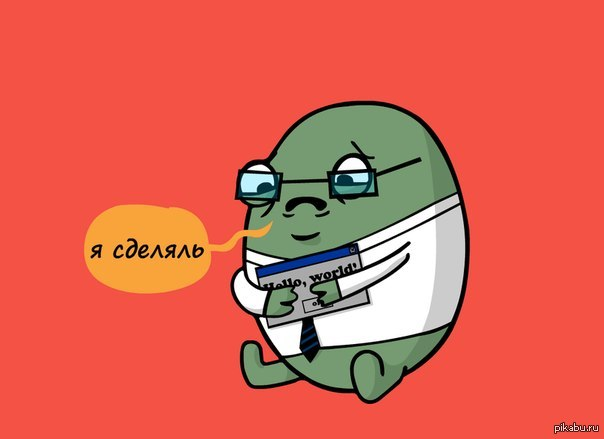

In [50]:
from IPython.display import Image
Image("please.jpg", width=1000)

А здесь посоветуйте преподавателям хороший фильм или сериал.

Фильм: Заплати другому
Посмотрите обязательно, очень хороший фильм с непредсказуемой концовкой.